# compare algorithms performance

## Import library

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

## Load dataset

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

## Split dataset

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Algorithms and hyperparameters

In [8]:
# Algorithms and hyperparameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 10, None]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

## Train, tune and evaluate each model

In [9]:
# Train, tune and evaluate each model
best_models = {}
for name, m in models.items():
    clf = GridSearchCV(m['model'], m['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_models[name] = {
        'best_estimator': clf.best_estimator_,
        'best_params': clf.best_params_,
        'accuracy': accuracy
    }

## Print results

In [10]:
# Print results
for name, model_info in best_models.items():
    print(f"Model: {name}")
    print(f"Best Estimator: {model_info['best_estimator']}")
    print(f"Best Params: {model_info['best_params']}")
    print(f"Accuracy: {model_info['accuracy']}\n")

Model: LogisticRegression
Best Estimator: LogisticRegression(C=0.1, solver='liblinear')
Best Params: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.9912280701754386

Model: DecisionTree
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_split=10)
Best Params: {'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.9473684210526315

Model: RandomForest
Best Estimator: RandomForestClassifier()
Best Params: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.956140350877193

Model: SVM
Best Estimator: SVC(C=1)
Best Params: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9824561403508771

Model: KNN
Best Estimator: KNeighborsClassifier()
Best Params: {'n_neighbors': 5}
Accuracy: 0.9473684210526315

Model: NaiveBayes
Best Estimator: GaussianNB()
Best Params: {}
Accuracy: 0.9649122807017544

Model: XGBoost
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None,

# Analyze the accuracy results of different models
To analyze the accuracy results of different models and implement additional performance metrics, we will modify the script to include precision, recall, and F1-score calculations. We'll use the classification_report from sklearn.metrics for detailed evaluation. Here's the updated script:

## Import library

In [11]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

## Load dataset

In [12]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

## Split dataset

In [13]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Algorithms and hyperparameters

In [15]:
# Algorithms and hyperparameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 10, None]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

## Train, tune and evaluate each model

In [16]:
# Train, tune and evaluate each model
best_models = {}
for name, m in models.items():
    clf = GridSearchCV(m['model'], m['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    best_models[name] = {
        'best_estimator': clf.best_estimator_,
        'best_params': clf.best_params_,
        'accuracy': accuracy,
        'report': report
    }

## Print results

In [17]:
# Print results
for name, model_info in best_models.items():
    print(f"Model: {name}")
    print(f"Best Estimator: {model_info['best_estimator']}")
    print(f"Best Params: {model_info['best_params']}")
    print(f"Accuracy: {model_info['accuracy']}")
    print(f"Classification Report: {model_info['report']}\n")

Model: LogisticRegression
Best Estimator: LogisticRegression(C=0.1, max_iter=10000, solver='liblinear')
Best Params: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.9912280701754386
Classification Report: {'0': {'precision': 1.0, 'recall': 0.9767441860465116, 'f1-score': 0.9882352941176471, 'support': 43.0}, '1': {'precision': 0.9861111111111112, 'recall': 1.0, 'f1-score': 0.993006993006993, 'support': 71.0}, 'accuracy': 0.9912280701754386, 'macro avg': {'precision': 0.9930555555555556, 'recall': 0.9883720930232558, 'f1-score': 0.99062114356232, 'support': 114.0}, 'weighted avg': {'precision': 0.991349902534113, 'recall': 0.9912280701754386, 'f1-score': 0.991207141671538, 'support': 114.0}}

Model: DecisionTree
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_split=10)
Best Params: {'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.9473684210526315
Classification Report: {'0': {'precision': 0.9302325581395349, 'recall': 0.9302325581395349, 'f1-score': 0.9302325581395349

# compare the models based on the provided metrics
To compare the models based on the provided metrics and determine which performs best overall, we'll need to systematically review the accuracy, precision, recall, and F1-score for each model. After that, we'll visualize these metrics using bar charts.

First, let's extend our script to collect the metrics and then use matplotlib to create the visualizations.

## Import library

In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

## Load dataset

In [19]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

## Split dataset

In [20]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Algorithms and hyperparameters

In [22]:
# Algorithms and hyperparameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 10, None]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

## Train, tune and evaluate each model

In [23]:
# Train, tune and evaluate each model
best_models = {}
for name, m in models.items():
    clf = GridSearchCV(m['model'], m['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    best_models[name] = {
        'best_estimator': clf.best_estimator_,
        'best_params': clf.best_params_,
        'accuracy': accuracy,
        'report': report
    }

## Print results

In [24]:
# Print results
for name, model_info in best_models.items():
    print(f"Model: {name}")
    print(f"Best Estimator: {model_info['best_estimator']}")
    print(f"Best Params: {model_info['best_params']}")
    print(f"Accuracy: {model_info['accuracy']}")
    print(f"Classification Report: {model_info['report']}\n")

Model: LogisticRegression
Best Estimator: LogisticRegression(C=0.1, max_iter=10000, solver='liblinear')
Best Params: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.9912280701754386
Classification Report: {'0': {'precision': 1.0, 'recall': 0.9767441860465116, 'f1-score': 0.9882352941176471, 'support': 43.0}, '1': {'precision': 0.9861111111111112, 'recall': 1.0, 'f1-score': 0.993006993006993, 'support': 71.0}, 'accuracy': 0.9912280701754386, 'macro avg': {'precision': 0.9930555555555556, 'recall': 0.9883720930232558, 'f1-score': 0.99062114356232, 'support': 114.0}, 'weighted avg': {'precision': 0.991349902534113, 'recall': 0.9912280701754386, 'f1-score': 0.991207141671538, 'support': 114.0}}

Model: DecisionTree
Best Estimator: DecisionTreeClassifier(min_samples_split=10)
Best Params: {'max_depth': None, 'min_samples_split': 10}
Accuracy: 0.9298245614035088
Classification Report: {'0': {'precision': 0.9069767441860465, 'recall': 0.9069767441860465, 'f1-score': 0.9069767441860465, 'support

## Collect metrics for visualization

In [25]:
# Collect metrics for visualization
metrics = ['precision', 'recall', 'f1-score']
scores = {metric: {} for metric in metrics}

for name, model_info in best_models.items():
    for metric in metrics:
        scores[metric][name] = model_info['report']['weighted avg'][metric]

## Visualize the metrics

In [28]:
# Visualize the metrics
def plot_metrics(scores, metric):
    plt.figure(figsize=(10, 6))
    models = list(scores[metric].keys())
    values = list(scores[metric].values())
    plt.barh(models, values)
    plt.xlabel(metric.capitalize())
    plt.title(f'Model Comparison based on {metric.capitalize()}')
    plt.xlim(0, 1)
    plt.show()

## Plot each metric

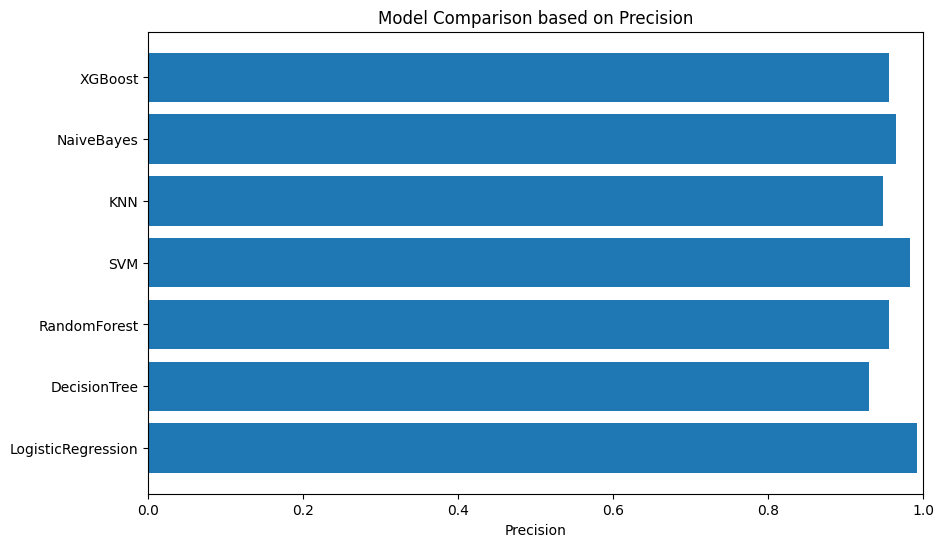

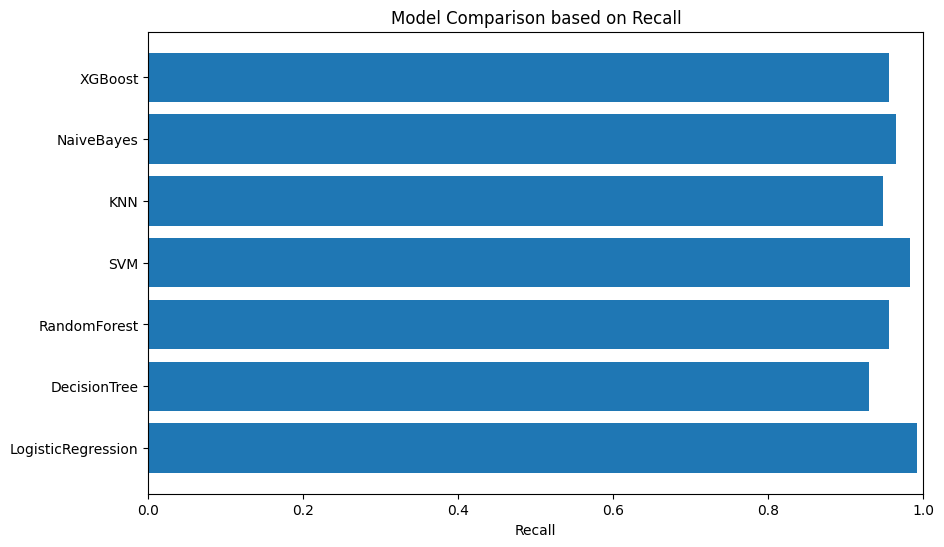

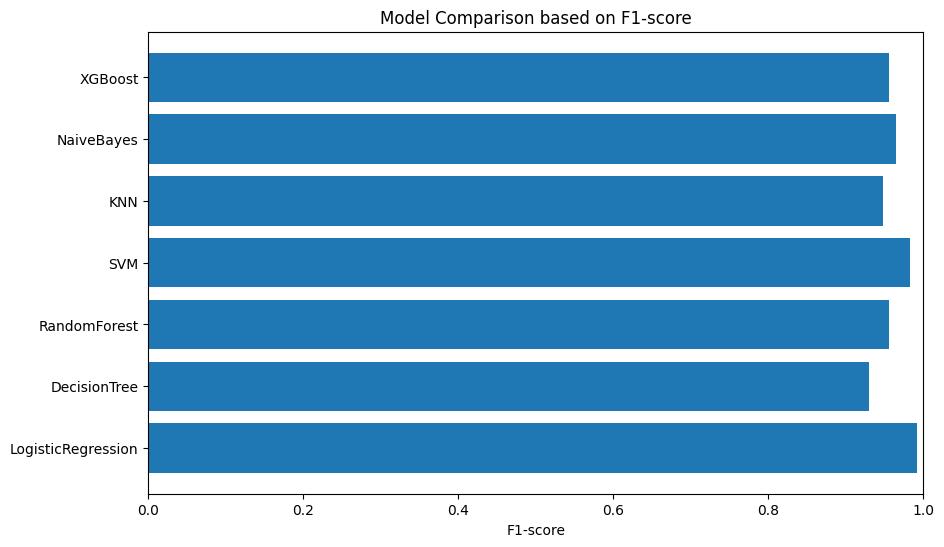

In [29]:
# Plot each metric
for metric in metrics:
    plot_metrics(scores, metric)